# Contexto de Pesquisa

**Aplicativo Desrotulando**

O aplicativo [Desrotulando](https://desrotulando.com/) disponibiliza, de forma gratuita, avaliações de rotulagens de produtos industrializados para consumidores. A avaliação é feita por meio de um food score interno, baseado na legislação de rotulagem vigente do Brasil pelo órgão regulatório [ANVISA](https://www.gov.br/anvisa/pt-br/assuntos/alimentos/rotulagem). 

O usuário pode fazer a busca por palavras chaves dentro do aplicativo, ou por meio de escaneamento do código de barras do produto. A base de dados é fomentada pelos próprios usuários, que fornecem as fotos do rótulo e as informações básicas de cadastro do produto, como marca e categoria. As demais informações são cadastradas pela equipe interna do aplicativo.

A empresa tem interesse em diversificar a base de produtos cadastrados atualmente, focando em itens com alto score nutricional, como os que possuem os selos "orgânico" e "clean label".

Para tanto, a empresa gostaria de desenvolver uma análise  das categorias mais acessadas por usuários, e sua relação com os atributos de rotulagens mais relevantes.

Questão de Pesquisa:
- É possível prever a ocorrência de selos nutricionais de novos produtos com as informações disponíveis no base de dados do aplicativo?

A base de dados desse projeto compreende 8107 linhas, em 14 colunas. São consideradas as 6 principais categorias de produto com maior número de acessos entre maio a outubro 2022. 

[Dataset](https://github.com/asuperti/machile_learning/)

[Dicionário de Dados](https://docs.google.com/document/d/1GScayuAPbXdg4IYYoo8tc4WXt23Naz8GZHTbpH1zLQA/edit?usp=sharing)


#Análise Exploratória

Vamos iniciar a análise explorátoria com a extração dos dados.

In [1]:
import sys
import numpy as np
import scipy
import os
import csv
import datetime
import seaborn as sns
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/asuperti/machile_learning/main/APP_FINAL.csv'
app = pd.read_csv (url, sep = ';')


Abaixo, algumas informações sobre o arquivo: 8107 linhas e 14 colunas.

In [3]:
app.shape

(8107, 14)

Avaliando as primeiras e últimas colunas do arquivo.

In [4]:
app.head()


,CATEGORIA,MARCA,REST_OA,REST_GT,REST_AAD,REST_AAR,REST_AN,REST_CN,REST_CA,REST_PREC,SELO_CLEAN,SELO_VEGAN,SELO_TRANS,SELO_ORGANIC
0,Iogurte,Fazenda Bela Vista,sim,não,sim,não,não,não,não,não,não,não,não,não
1,Iogurte,Danone,sim,não,sim,não,não,não,não,não,não,não,não,não
2,Iogurte,Danone,sim,não,sim,não,não,não,não,não,não,não,não,não
3,Pão,Italianinho,sim,não,sim,não,não,não,não,não,não,não,não,não
4,Iogurte,Danone,sim,não,sim,não,não,não,não,não,não,não,não,não


In [5]:
app.tail()

,CATEGORIA,MARCA,REST_OA,REST_GT,REST_AAD,REST_AAR,REST_AN,REST_CN,REST_CA,REST_PREC,SELO_CLEAN,SELO_VEGAN,SELO_TRANS,SELO_ORGANIC
8102,Pão,Viva Livre,sim,não,sim,não,não,não,não,não,não,não,não,não
8103,Pão,Nutrella,sim,não,não,sim,não,não,não,não,não,não,não,não
8104,Pasta de Amendoim,Shambala,não,não,não,não,não,não,não,não,sim,não,não,não
8105,Pão,Via Delícia,não,não,não,não,não,não,não,não,sim,não,não,não
8106,Chocolate,Amma,não,não,sim,não,não,não,não,não,sim,não,não,sim


Os dados estão todos corretos.

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CATEGORIA     8107 non-null   object
 1   MARCA         8107 non-null   object
 2   REST_OA       8107 non-null   object
 3   REST_GT       8107 non-null   object
 4   REST_AAD      8107 non-null   object
 5   REST_AAR      8107 non-null   object
 6   REST_AN       8107 non-null   object
 7   REST_CN       8107 non-null   object
 8   REST_CA       8107 non-null   object
 9   REST_PREC     8107 non-null   object
 10  SELO_CLEAN    8107 non-null   object
 11  SELO_VEGAN    8107 non-null   object
 12  SELO_TRANS    8107 non-null   object
 13  SELO_ORGANIC  8107 non-null   object
dtypes: object(14)
memory usage: 886.8+ KB


Não existem missing values e todos os dados são do tipo "object" (categóricos).





In [7]:
app.columns

Index(['CATEGORIA', 'MARCA', 'REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR',
       'REST_AN', 'REST_CN', 'REST_CA', 'REST_PREC', 'SELO_CLEAN',
       'SELO_VEGAN', 'SELO_TRANS', 'SELO_ORGANIC'],
      dtype='object')

In [8]:
app.describe(include='all').T

,count,unique,top,freq
CATEGORIA,8107,6,Chocolate,2311
MARCA,8107,1781,Nestlé,208
REST_OA,8107,2,sim,6654
REST_GT,8107,2,não,6637
REST_AAD,8107,2,sim,4998
REST_AAR,8107,2,não,7529
REST_AN,8107,2,não,7087
REST_CN,8107,2,não,7446
REST_CA,8107,2,não,7713
REST_PREC,8107,2,não,7475


A variável MARCA apresenta o maior número de variáveis únicas, seguido de CATEGORIA. AÇÚCAR ADICIONADO e ORIGEM ANIMAL são as  restrições alimentares mais frequentes. Selo CLEAN LABEL com maior ocorrência entre os dados de selo nutricionais dos itens analisados. Abaixo, algumas visualizações específicas de dados. 

In [9]:
mask = app['CATEGORIA'].value_counts()
df_10 = app[app['CATEGORIA'].isin(mask.index[mask > 10])]

In [10]:
app["CATEGORIA"].value_counts()

Chocolate            2311
Pão                  2231
Iogurte              1354
Leite                 846
Molho de Tomate       745
Pasta de Amendoim     620
Name: CATEGORIA, dtype: int64

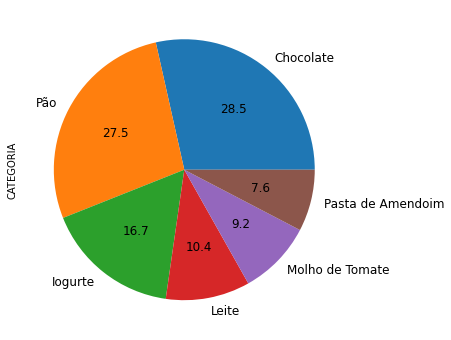

In [11]:
values = df_10['CATEGORIA'].value_counts()
plt.figure(figsize=(8,6))
values.plot(kind='pie',fontsize=12, autopct='%.1f')
plt.show()

"CHOCOLATE" e "PÃO" com a maior representatividade entre as categorias: 28,5% e 27,5% dos itens, respectivamente.

In [12]:
app["MARCA"].value_counts()

Nestlé        208
Cacau Show    117
Itambé        103
Danone         96
Vigor          94
             ... 
Aipï            1
PanDão          1
Kero Kero       1
Bom Cacau       1
Shambala        1
Name: MARCA, Length: 1781, dtype: int64

Marcas "Nestlé", "Cacau Show" e "Itambé" com maior número de itens cadastrados - 12%, 7% e 3% do total de marcas. 

In [13]:
mask = app['REST_AAD'].value_counts()
ad = app[app['REST_AAD'].isin(mask.index[mask > 10])]

In [14]:
app['REST_AAD'].value_counts()


sim    4998
não    3109
Name: REST_AAD, dtype: int64

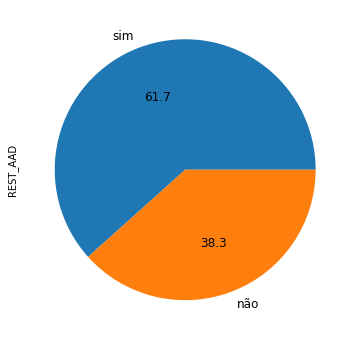

In [15]:
from pandas.io.pytables import adjoin
values = ad['REST_AAD'].value_counts()
plt.figure(figsize=(8,6))
values.plot(kind='pie',fontsize=12, autopct='%.1f')
plt.show()

61,7% dos produtos possuem a variável "AÇÚCAR ADICIONADO".

In [16]:
mask = app['REST_OA'].value_counts()
org = app[app['REST_OA'].isin(mask.index[mask > 10])]

In [17]:
app['REST_OA'].value_counts()

sim    6654
não    1453
Name: REST_OA, dtype: int64

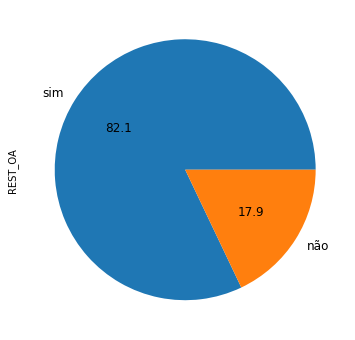

In [18]:
values = org['REST_OA'].value_counts()
plt.figure(figsize=(8,6))
values.plot(kind='pie',fontsize=12, autopct='%.1f')
plt.show()

82,1% dos produtos possuem a variável "ORIGEM ANIMAL".

In [19]:
mask = app['SELO_CLEAN'].value_counts()
clean = app[app['SELO_CLEAN'].isin(mask.index[mask > 10])]
clean['SELO_CLEAN'].value_counts()

não    6705
sim    1402
Name: SELO_CLEAN, dtype: int64

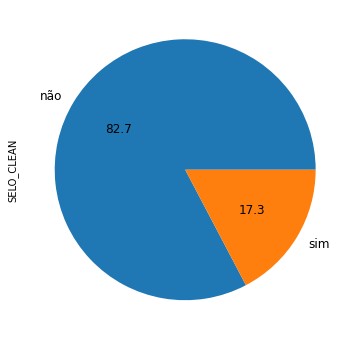

In [20]:
values = clean['SELO_CLEAN'].value_counts()
plt.figure(figsize=(8,6))
values.plot(kind='pie',fontsize=12, autopct='%.1f')
plt.show()

17,3% dos produtos possuem o selo "CLEAN LABEL".

Na próxima seção, vamos preparar os dados para o início da nossa fase de análise. 

#Transformando Variáveis Categóricas em Numéricas (Label Encoder)

Para o desenvolvimento das análises, vamos transformar os dados categóricos em numéricos.

In [21]:
from nltk.classify.scikitlearn import LabelEncoder
#Transformar em variável numérica
from sklearn import preprocessing
for variaveis in ['CATEGORIA', 'MARCA','REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR','REST_AN','REST_CN', 'REST_CA', 'REST_PREC', 'SELO_CLEAN', 'SELO_VEGAN', 'SELO_TRANS', 'SELO_ORGANIC']:
  app[variaveis] = LabelEncoder().fit_transform(app[variaveis])

In [22]:
app.value_counts()

CATEGORIA  MARCA  REST_OA  REST_GT  REST_AAD  REST_AAR  REST_AN  REST_CN  REST_CA  REST_PREC  SELO_CLEAN  SELO_VEGAN  SELO_TRANS  SELO_ORGANIC
0          642    1        1        1         0         0        0        0        0          0           0           0           0               72
           1054   1        1        1         0         0        0        0        0          0           0           0           0               67
           821    1        1        1         0         0        0        0        0          0           0           0           0               61
           230    1        0        1         0         0        0        0        0          0           0           0           0               60
           868    1        0        1         0         0        0        0        0          0           0           0           0               60
                                                                                                                

Parece que a conversão foi bem sucedida. Vamos fazer mais alguns testes abaixo.

In [23]:
app.CATEGORIA.value_counts()

0    2311
5    2231
1    1354
2     846
3     745
4     620
Name: CATEGORIA, dtype: int64

In [24]:
app.MARCA.value_counts()

1054    208
230     117
756     103
436      96
1702     94
       ... 
27        1
1167      1
794       1
185       1
1518      1
Name: MARCA, Length: 1781, dtype: int64

In [25]:
app.REST_OA.value_counts()

1    6654
0    1453
Name: REST_OA, dtype: int64

In [26]:
app.SELO_CLEAN.value_counts()

0    6705
1    1402
Name: SELO_CLEAN, dtype: int64

Os exemplos acima estão corretos, sem valores faltantes. Podemos, então, iniciar nossa análise.

#Correlações 

Agora que as variáveis foram convertidas para o formato numérico, vamos avaliar suas correlações.

In [27]:
corr_matrix = app.corr()
print(corr_matrix)

              CATEGORIA     MARCA   REST_OA   REST_GT  REST_AAD  REST_AAR  \
CATEGORIA      1.000000  0.134933 -0.194744  0.022225 -0.048256 -0.063352   
MARCA          0.134933  1.000000 -0.010328 -0.005441  0.013228  0.011587   
REST_OA       -0.194744 -0.010328  1.000000  0.184027  0.144706  0.103229   
REST_GT        0.022225 -0.005441  0.184027  1.000000  0.269124 -0.064456   
REST_AAD      -0.048256  0.013228  0.144706  0.269124  1.000000 -0.206381   
REST_AAR      -0.063352  0.011587  0.103229 -0.064456 -0.206381  1.000000   
REST_AN       -0.193186 -0.024183  0.078367 -0.026983 -0.338736  0.236006   
REST_CN       -0.192871 -0.002459  0.135704 -0.074706  0.123749  0.146922   
REST_CA       -0.119504 -0.013943  0.104120  0.003809  0.120450  0.066677   
REST_PREC     -0.061943  0.013556  0.081896 -0.015043  0.082670  0.277031   
SELO_CLEAN     0.037459 -0.011326 -0.387537 -0.215203 -0.218230 -0.126698   
SELO_VEGAN    -0.028589 -0.020674 -0.067197 -0.037813 -0.012896 -0.016257   

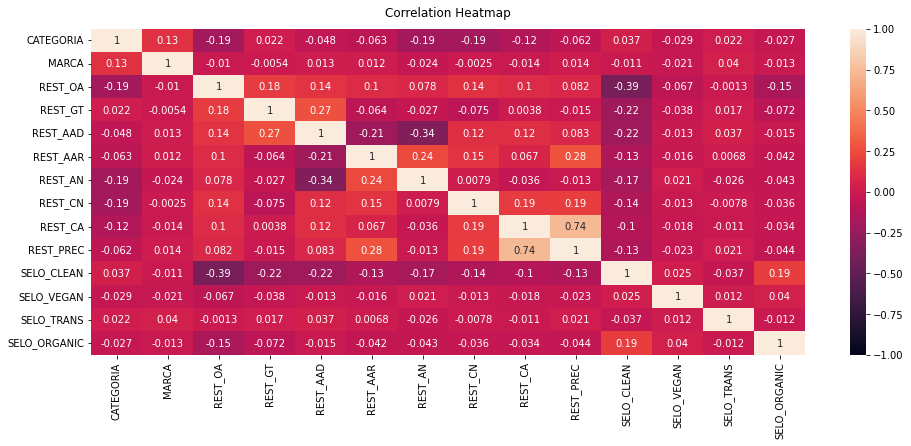

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(app.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

No heatmap acima, pode-se observar que a maioria das variáveis não possuem alta correlação. Exceção está na relação de Corante Artificial e Aditivo com Restrição (0,74). Abaixo, vamos analisar algumas das variáveis com maior detalhamento.

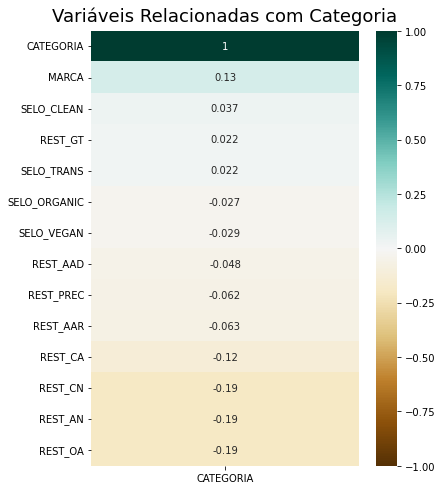

In [29]:
app.corr()[['CATEGORIA']].sort_values(by='CATEGORIA', ascending=False)
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(app.corr()[['CATEGORIA']].sort_values(by='CATEGORIA', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variáveis Relacionadas com Categoria', fontdict={'fontsize':18}, pad=10);


Para CATEGORIA, a variável com relação mais significativa (porém sem expressividade) é a de MARCA.

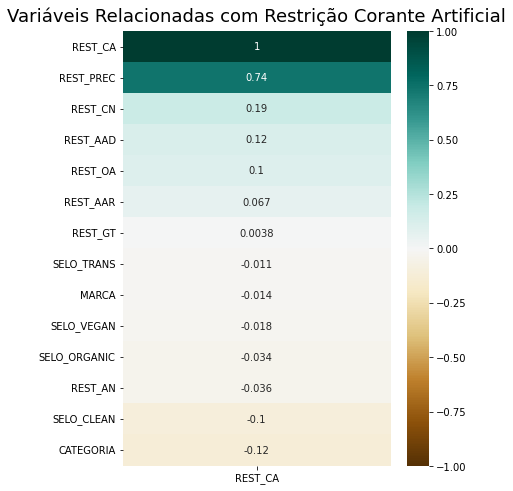

In [30]:
app.corr()[['REST_CA']].sort_values(by='REST_CA', ascending=False)
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(app.corr()[['REST_CA']].sort_values(by='REST_CA', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variáveis Relacionadas com Restrição Corante Artificial', fontdict={'fontsize':18}, pad=10);

Como exemplo do grupo de variáveis de restrição, a variável CORANTE ARTIFICIAL foi analisada. Esta apresenta alta correlação com ADITIVO COM PRECAUÇÃO. 

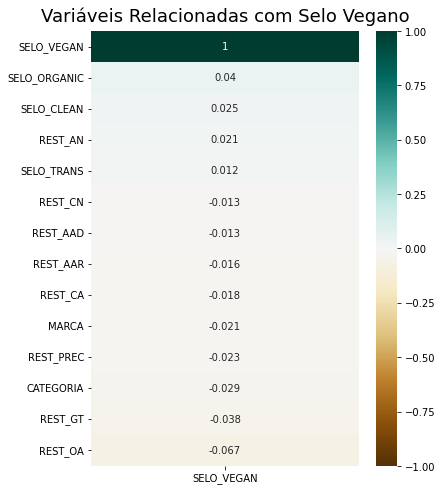

In [31]:
app.corr()[['SELO_VEGAN']].sort_values(by='SELO_VEGAN', ascending=False)
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(app.corr()[['SELO_VEGAN']].sort_values(by='SELO_VEGAN', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variáveis Relacionadas com Selo Vegano', fontdict={'fontsize':18}, pad=10);

Como exemplo do grupo de variáveis de incidência de selos, foi analisado a variável SELO VEGANO. Esta apresenta alguma relação com outros selos como SELO ORGÂNICO e SELO CLEAN LABEL. 

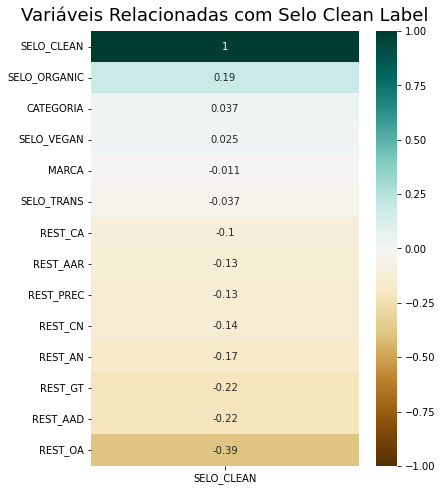

In [32]:
app.corr()[['SELO_CLEAN']].sort_values(by='SELO_CLEAN', ascending=False)
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(app.corr()[['SELO_CLEAN']].sort_values(by='SELO_CLEAN', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variáveis Relacionadas com Selo Clean Label', fontdict={'fontsize':18}, pad=10);

Já com a variável CLEAN LABEL, nota-se uma relação interessante: todos as variáveis restritivas possuem relação nula ou negativa. Isso confirma a definição do selo que, conceitualmente, deve ser isento de aditivos alimentares. Para essa pesquisa, vamos usar esse selo como parâmetro para o teste de predição dos modelos. 

Na sequência, vamos dividir nossa base em teste e treinamento para iniciar as análises.  

#Divisão Teste e Treinamento

Vamos separar os dados em teste (30%) e treinamento (70%). 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier    
from sklearn.metrics import classification_report        
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Como citado, vamos buscar prever a ocorrência da variável SELO CLEAN LABEL nos modelos do estudo.

In [34]:
x = app[['MARCA', 'CATEGORIA', 'REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR','REST_AN', 'REST_CN', 'REST_CA', 'REST_PREC','SELO_VEGAN', 'SELO_TRANS', 'SELO_ORGANIC']]
y = app['SELO_CLEAN']

#'MARCA', 'REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR',
       #'REST_AN', 'REST_CN', 'REST_CA', 'REST_PREC', 'SELO_CLEAN',
       #'SELO_VEGAN', 'SELO_TRANS', 'SELO_ORGANIC'

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

In [36]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (5674, 13)
Size of y_train: (5674,)
Size of x_test: (2433, 13)
Size of y_test: (2433,)


In [37]:
from sklearn.model_selection import train_test_split                               

data_train, data_test = train_test_split(app, test_size = 0.3, random_state = 42)  
print("The size of train set is: ", len(data_train))                               
print("The size of test set is:  ", len(data_test))                                 

The size of train set is:  5674
The size of test set is:   2433


Agora, vamos iniciar o teste nos modelos de algoritmos previstos.

# Testando Modelos




## Logistic Regression


Nessa primeira análise, vamos testar o modelo de Regressão Logística.


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [39]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [40]:
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.7233867653103164


Acurácia do modelo é interessante, mas poderia ser melhor - em especial, na variável "1" ("sim"), conforme relacionado na confusion matrix abaixo. 

In [41]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[1445  242]
 [ 431  315]]


              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1687
           1       0.57      0.42      0.48       746

    accuracy                           0.72      2433
   macro avg       0.67      0.64      0.65      2433
weighted avg       0.71      0.72      0.71      2433



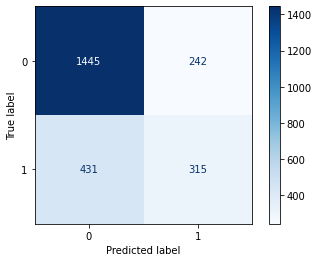

In [42]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
Lmatrix_logreg = plot_confusion_matrix(logreg, x_test, y_test, cmap=plt.cm.Blues)

Número significativo de verdadeiros positivos/verdadeiros negativos podem ser identificados na confusion matrix acima. 

Abaixo, vamos testar um novo modelo para buscar um resultado mais preciso. 

## Decision Tree Classifier

Vamos avaliar o modelo de árvore de decisão para a previsão da variável CLEAN LABEL. 

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz

In [44]:
#split dataset in features and target variable
feature_cols = ['SELO_VEGAN','SELO_TRANS', 'MARCA', 'REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR','REST_AN', 'REST_CN', 'REST_CA', 'REST_PREC', 'CATEGORIA', 'SELO_ORGANIC']
x = app[feature_cols] # Features
y = app.SELO_CLEAN # Target variable

In [45]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8516235100698726


Podemos observar que a acurácia aumentou com esse modelo. Abaixo, a sua confusion matrix, e índices de precisão e recall. Variável 1 ("sim") também aumenta sua precisão com esse modelo.

In [48]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1872  125]
 [ 236  200]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1997
           1       0.62      0.46      0.53       436

    accuracy                           0.85      2433
   macro avg       0.75      0.70      0.72      2433
weighted avg       0.84      0.85      0.84      2433



[Text(0.4583333333333333, 0.875, 'X[3] <= 0.5\ngini = 0.283\nsamples = 5674\nvalue = [4708, 966]'),
 Text(0.25, 0.625, 'X[7] <= 0.5\ngini = 0.5\nsamples = 974\nvalue = [500, 474]'),
 Text(0.16666666666666666, 0.375, 'X[11] <= 4.5\ngini = 0.499\nsamples = 912\nvalue = [438, 474]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.478\nsamples = 676\nvalue = [267, 409]'),
 Text(0.25, 0.125, 'gini = 0.399\nsamples = 236\nvalue = [171, 65]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 0.5\ngini = 0.187\nsamples = 4700\nvalue = [4208, 492]'),
 Text(0.5, 0.375, 'X[7] <= 0.5\ngini = 0.338\nsamples = 1645\nvalue = [1291, 354]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.429\nsamples = 1136\nvalue = [782, 354]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 509\nvalue = [509, 0]'),
 Text(0.8333333333333334, 0.375, 'X[12] <= 0.5\ngini = 0.086\nsamples = 3055\nvalue = [2917, 138]'),
 Text(0.75, 0.125, 'gini = 0.0

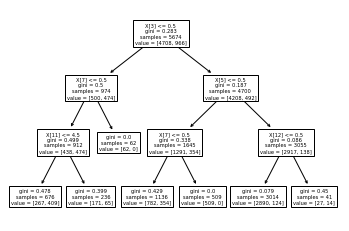

In [49]:
tree.plot_tree(clf)


O modelo mostrou-se o mais bem-sucedido até o momento. Vamos testar um novo modelo na sequência.

## Random Forest

Vamos avaliar o modelo de Random Forest para a 
previsão da variável CLEAN LABEL.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = app[['CATEGORIA', 'SELO_VEGAN', 'REST_OA', 'REST_GT', 'REST_AAD', 'REST_AAR','REST_AN', 'REST_CN', 'REST_CA', 'REST_PREC', 'SELO_TRANS','SELO_ORGANIC', 'MARCA']]
y = app['SELO_CLEAN']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = rfc.predict(x_test)


In [53]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy of the model is : ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1930   87]
 [ 104  312]]


Accuracy of the model is :  0.9214960953555281


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2017
           1       0.78      0.75      0.77       416

    accuracy                           0.92      2433
   macro avg       0.87      0.85      0.86      2433
weighted avg       0.92      0.92      0.92      2433



Esse modelo mostrou-se o melhor até o momento, com 92% de acurácia. Abaixo, um novo modelo será testado.

##Naive Bayes

Vamos avaliar o modelo de Naive Bayes (Gaussian, Multinominal e Bernoulli)  para a previsão da variável CLEAN LABEL.

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [56]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy of the model is : ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1016 1001]
 [   0  416]]


Accuracy of the model is :  0.5885737772297575


              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2017
           1       0.29      1.00      0.45       416

    accuracy                           0.59      2433
   macro avg       0.65      0.75      0.56      2433
weighted avg       0.88      0.59      0.63      2433



Gaussian Naive Bayes com a pior performance até o momento.

In [57]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [58]:
y_pred = mnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy of the model is : ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1924   93]
 [ 329   87]]


Accuracy of the model is :  0.8265515824085491


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2017
           1       0.48      0.21      0.29       416

    accuracy                           0.83      2433
   macro avg       0.67      0.58      0.60      2433
weighted avg       0.79      0.83      0.80      2433



Multinomial Naive Bayes com uma performance melhor, porém ainda pouco satisfatória para a variável 1 ( "sim"). 

In [60]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [61]:
y_pred = bnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8483


In [63]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy of the model is : ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1880  137]
 [ 232  184]]


Accuracy of the model is :  0.8483353884093712


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2017
           1       0.57      0.44      0.50       416

    accuracy                           0.85      2433
   macro avg       0.73      0.69      0.70      2433
weighted avg       0.84      0.85      0.84      2433



Bernoulli Naive Bayes com o melhor desempenho entre os modelos de Naive Bayes testados.

Três modelos foram testados: Gaussian, Multinomial e Bernoulli com acurácia de 58%, 82% e 84%, respectivamente. Ainda que a performance seja satisfatória para Bernoulli, não supera o resultado do modelo de Random Forest.

#Conclusão

Nesse projeto foram utilizados quatro modelos de aprendizado supervisionado: Regressão Logística, Árvore de Decisão, Random Forest (Florestas Aleatórias) e Naive Bayes. Ainda que todas as opções demonstrem um desempenho satisfatório para o problema de pesquisa, o modelo de Random Forest obteve o melhor resultado de acurácia - em torno de 91%. O modelo de Árvore de Decisão foi o segundo com o melhor desempenho, com aproximadamente 85% de acurácia.




#Limitações e Pesquisa Futura

O presente estudo utilizou uma variável como modelo (CLEAN LABEL) para a predição de selos nutricionais na base de dados do aplicativo. Futuramente, novas análises podem ser desenvolvidas com outros parâmetros como, por exemplo, a ocorrência de selos alergênicos. 

Ainda, pode-se considerar outros aspectos de rotulagem como preditores mais assertivos para os selos nutricionais, além de CATEGORIA, MARCA, DADOS DE RESTRIÇÃO e DEMAIS SELOS NUTRICIONAIS.

Pesquisas futuras podem, ainda, comparar esses resultados com outros modelos de classificação, como de Artificial Neural Network (ANN), ou modelos não-supervisionados, como o de K-means. Nesse sentido, devem ser considerados refinamentos, como uma análise de outliners. 